In [ ]:
#18/06/2025
#Tamim Mahmud from Daffodil International University

transform হলো
 preprocessing step, যা dataset লোড করার সময় প্রতিটা sample এর উপর apply হয়।
 ➡️ উদাহরণ:

image কে tensor এ convert করা

normalize করা

resize করা

augmentation (rotate, crop, flip, etc.) করা

Saving 500524133_122132913806757252_8000695147626585907_n.jpg to 500524133_122132913806757252_8000695147626585907_n.jpg
Tensor Shape: torch.Size([3, 960, 960])
Min Value: 0.0
Max Value: 1.0


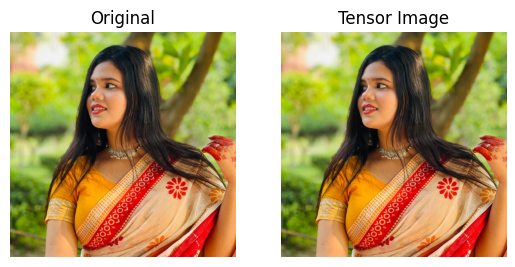

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image from your device
uploaded = files.upload()

# Step 2: Load the image
img = Image.open(next(iter(uploaded))).convert('RGB')

# Step 3: Transform
transform = transforms.ToTensor()
tensor_img = transform(img)

# Step 4: Show info
print("Tensor Shape:", tensor_img.shape)
print("Min Value:", tensor_img.min().item())
print("Max Value:", tensor_img.max().item())

# Step 5: Plot
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tensor_img.permute(1, 2, 0)) # permute(1,2,0) → [C,H,W] → [H,W,C] করতে হয় কারণ matplotlib expects [H,W,C]

plt.title("Tensor Image")
plt.axis('off')
plt.show()


🔹 next(iter(uploaded)) → uploaded dictionary থেকে প্রথম ফাইলের নাম বের করে

🔹 Image.open(...) → PIL দিয়ে ফাইলটা image হিসেবে খুলে

🔹 .convert('RGB') → grayscale বা অন্য format থাকলে RGB করে নেয় (PyTorch এর জন্য standard format)

🔹 transforms.ToTensor():

Image → Tensor এ convert করে


Shape: [H, W, C] → [C, H, W] (PyTorch format)


Pixel values: 0–255 → scale করে 0.0–1.0 এর মধ্যে float value


🔹 Tensor এর shape দেখে বোঝা যায়:

Channels (C) = 3 → RGB

H = height, W = width
🔹 Min–Max value check করা হয়: সব pixel 0 থেকে 1 এর মধ্যে কিনা


প্রথম ছবি: PIL image

🔹 দ্বিতীয় ছবি: tensor থেকে numpy image

1️⃣	Image upload
2️⃣	PIL দিয়ে image load ও RGB conversion
3️⃣	ToTensor দিয়ে PyTorch tensor এ রূপান্তর
4️⃣	Shape ও pixel value range check
5️⃣	Image show side by side (original vs tensor)


Saving 480578378_1458457305559355_5286223969378221325_n.jpg to 480578378_1458457305559355_5286223969378221325_n (8).jpg
tensor shape: torch.Size([3, 128, 128])
Min value: -1.0
Max Value: 0.772549033164978


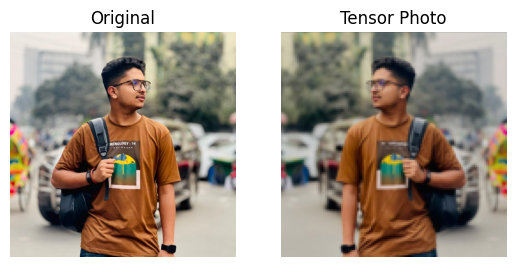

In [22]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files
import torch

# Step 1: Upload image from device
uploaded = files.upload()

# Step 2: Load the image and convert to RGB
img = Image.open(next(iter(uploaded))).convert('RGB')

# Step 3: Define transform pipeline
transform = transforms.Compose([
    transforms.Resize((128, 128)),                  # Resize image to 128x128
    transforms.RandomHorizontalFlip(p=0.5),         # 50% chance to flip image horizontally
    transforms.ColorJitter(brightness=0.3),         # Random brightness adjustment
    transforms.ToTensor(),                          # Convert to Tensor [C, H, W] and scale to [0, 1]
    transforms.Normalize(mean=[0.5, 0.5, 0.5],       # Normalize with mean and std
                         std=[0.5, 0.5, 0.5])        # Now values will be in range [-1, 1]
])

# Step 4: Apply transform
tensor_img = transform(img)

# Step 5: Un-normalize for display (reverse Normalize)
unnormalize = transforms.Normalize(
    mean=[-1, -1, -1],
    std=[1/0.5, 1/0.5, 1/0.5]
)
img_for_display = unnormalize(tensor_img).clamp(0, 1)

# Step 6: Show
print("Tensor Shape:", tensor_img.shape)
print("Min Value:", tensor_img.min().item())
print("Max Value:", tensor_img.max().item())

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_for_display.permute(1, 2, 0))
plt.title("Transformed")
plt.axis('off')
plt.show()


Saving 480578378_1458457305559355_5286223969378221325_n.jpg to 480578378_1458457305559355_5286223969378221325_n (9).jpg


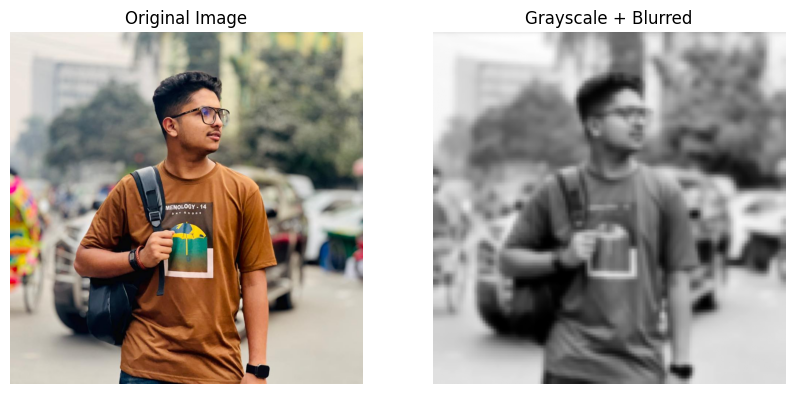

Tensor Shape: torch.Size([1, 128, 128])
Min Pixel Value: 0.0235294122248888
Max Pixel Value: 0.9333333373069763


In [23]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Load image as RGB
img = Image.open(next(iter(uploaded))).convert('RGB')

# Step 3: Define grayscale and blur transform
transform = transforms.Compose([
    transforms.Resize((128, 128)),                 # Resize to 128x128
    transforms.Grayscale(num_output_channels=1),   # Convert to Grayscale Image কে blur করে (noise কমাতে বা variation বাড়াতে)
    transforms.GaussianBlur(kernel_size=5),        # Apply Gaussian Blur Image কে blur করে (noise কমাতে বা variation বাড়াতে)
    transforms.ToTensor()                          # Convert to tensor
])

# Step 4: Apply transform
tensor_img = transform(img)

# Step 5: Plot original and transformed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tensor_img.squeeze(), cmap='gray')  # Remove channel dim for grayscale
plt.title("Grayscale + Blurred")
plt.axis('off')

plt.show()

# Step 6: Tensor Info
print("Tensor Shape:", tensor_img.shape)
print("Min Pixel Value:", tensor_img.min().item())
print("Max Pixel Value:", tensor_img.max().item())


Saving 480578378_1458457305559355_5286223969378221325_n.jpg to 480578378_1458457305559355_5286223969378221325_n (10).jpg


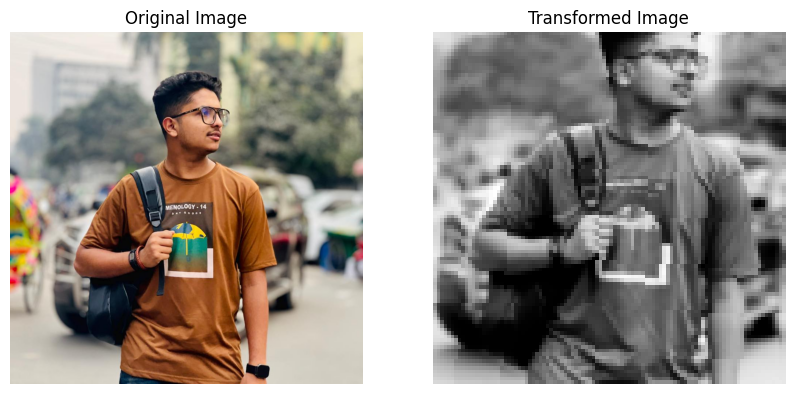

Tensor Shape: torch.Size([1, 100, 100])
Min: 0.0
Max: 0.9921568632125854


In [27]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()

# Step 2: Load the image (as RGB)
img = Image.open(next(iter(uploaded))).convert('RGB')

# Step 3: Define a rich transform pipeline
transform = transforms.Compose([
    transforms.RandomResizedCrop(size=128, scale=(0.8, 1.0)),  # Random crop and resize
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)), # Random rotation + translation
    transforms.CenterCrop(size=100),                           # Center crop
    transforms.ColorJitter(brightness=0.2, contrast=0.2),      # Random brightness & contrast
    transforms.Grayscale(num_output_channels=1),               # Convert to grayscale
    transforms.GaussianBlur(kernel_size=3),                    # Blur
    transforms.ToTensor()                                      # Convert to tensor
])

# Step 4: Apply transform
tensor_img = transform(img)

# Step 5: Plot both images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(tensor_img.squeeze(), cmap='gray')  # Grayscale image = 1 channel
plt.title("Transformed Image")
plt.axis('off')

plt.show()

# Step 6: Tensor info
print("Tensor Shape:", tensor_img.shape)
print("Min:", tensor_img.min().item())
print("Max:", tensor_img.max().item())


In [30]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms:
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np
from google.colab import files
upload=files.upload()


class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Saving wine.csv to wine (1).csv
Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])
